In [1]:
from qiskit import QuantumRegister
from qiskit import ClassicalRegister
from qiskit import QuantumCircuit
from numpy import pi

NUM_ITER = 5
EDGES = [(0, 1), (0, 2), (0, 3), (0, 7), (1, 3),
         (1, 4), (1, 8), (2, 3), (2, 5), (2, 6),
         (2, 7), (2, 9), (3, 4), (3, 5), (3, 6),
         (3, 7), (4, 6), (4, 8), (5, 6), (5, 10),
         (6, 10), (9, 10)]

EDGE_GROUPS = [[(2, 3), (2, 5), (2, 6), (2, 7)],
               [(0, 1), (0, 2), (0, 3), (0, 7)],
               [(1, 3), (1, 4)],
               [(3, 4), (3, 5), (3, 6), (3, 7)],
               [(4, 6)],
               [(5, 6)]
               ]

EXT_VERTICES = [
    ('A', [0, 2, 3]),
    ('B', [1, 4]),
    ('D', [5, 6]),
    ('C', [2])
]


def check_same_color_new(qc, qdistricts, qancilla, edge, i):
    start, end = edge
    if end == 7:
        check_same_color_with_A(qc, qdistricts[2 * start], qdistricts[2 * start + 1], qancilla[i])
    elif end == 8:
        check_same_color_with_B(qc, qdistricts[2 * start], qdistricts[2 * start + 1], qancilla[i])
    elif end == 9:
        # check_same_color_with_C(qc, qdistricts[2*n], qdistricts[2*n+1], qancilla[i])
        check_same_color(qc, qdistricts[2 * start], qdistricts[2 * start + 1], qdistricts[14], qdistricts[15], qancilla[i])
    elif end == 10:
        check_same_color_with_D(qc, qdistricts[2 * start], qdistricts[2 * start + 1], qancilla[i])
    else:
        check_same_color(qc, qdistricts[2 * start], qdistricts[2 * start + 1], qdistricts[2 * end], qdistricts[2 * end + 1],
                         qancilla[i])


def check_same_color_new_reverse(qc, qdistricts, qancilla, edge, i):
    start, end = edge
    if end == 7:
        check_same_color_with_A_reverse(qc, qdistricts[2 * start], qdistricts[2 * start + 1], qancilla[i])
    elif end == 8:
        check_same_color_with_B_reverse(qc, qdistricts[2 * start], qdistricts[2 * start + 1], qancilla[i])
    elif end == 9:
        # check_same_color_with_C(qc, qdistricts[2*n], qdistricts[2*n+1], qancilla[i])
        check_same_color_reverse(qc, qdistricts[2 * start], qdistricts[2 * start + 1], qdistricts[14], qdistricts[15],
                                 qancilla[i])
    elif end == 10:
        check_same_color_with_D_reverse(qc, qdistricts[2 * start], qdistricts[2 * start + 1], qancilla[i])
    else:
        check_same_color_reverse(qc, qdistricts[2 * start], qdistricts[2 * start + 1], qdistricts[2 * end],
                                 qdistricts[2 * end + 1],
                                 qancilla[i])


def check_same_color(qc, q1, q2, q3, q4, a):
    qc.cx(q1, q3)
    qc.cx(q2, q4)
    qc.x(q3)
    qc.x(q4)
    qc.ccx(q3, q4, a)
    qc.x(a)


def check_same_color_reverse(qc, q1, q2, q3, q4, a):
    qc.x(a)
    qc.ccx(q3, q4, a)
    qc.x(q4)
    qc.x(q3)
    qc.cx(q2, q4)
    qc.cx(q1, q3)


def check_same_color_with_A(qc, q1, q2, a):
    qc.x(q1)
    qc.x(q2)
    qc.ccx(q1, q2, a)
    qc.x(a)


def check_same_color_with_A_reverse(qc, q1, q2, a):
    qc.x(a)
    qc.ccx(q1, q2, a)
    qc.x(q2)
    qc.x(q1)


def check_same_color_with_B(qc, q1, q2, a):
    qc.x(q1)
    qc.ccx(q1, q2, a)
    qc.x(a)


def check_same_color_with_B_reverse(qc, q1, q2, a):
    qc.x(a)
    qc.ccx(q1, q2, a)
    qc.x(q1)


def check_same_color_with_C(qc, q1, q2, a):
    qc.x(q2)
    qc.ccx(q1, q2, a)
    qc.x(a)


def check_same_color_with_C_reverse(qc, q1, q2, a):
    qc.x(a)
    qc.ccx(q1, q2, a)
    qc.x(q2)


def check_same_color_with_D(qc, q1, q2, a):
    qc.ccx(q1, q2, a)
    qc.x(a)


def check_same_color_with_D_reverse(qc, q1, q2, a):
    qc.x(a)
    qc.ccx(q1, q2, a)


def get_not_a_state():
    # A state is 00
    register = QuantumRegister(2)
    qc = QuantumCircuit(register, name='not_A')
    qc.ry(pi - 1.910634, 0)
    qc.x(1)
    qc.cx(0, 1)
    qc.ch(1, 0)
    return qc.to_instruction()


def get_not_b_state():
    # B state is 01
    register = QuantumRegister(2)
    qc = QuantumCircuit(register, name='not_B')
    qc.ry(1.910634, 0)
    qc.ch(0, 1)
    return qc.to_instruction()


def get_not_c_state():
    # C state is 10
    register = QuantumRegister(2)
    qc = QuantumCircuit(register, name='not_C')
    qc.ry(1.910634, 1)
    qc.ch(1, 0)
    return qc.to_instruction()


def get_not_d_state():
    # D state is 11
    register = QuantumRegister(2)
    qc = QuantumCircuit(register, name='not_D')
    qc.ry(pi - 1.910634, 0)
    qc.x(0)
    qc.ch(0, 1)
    qc.x(0)
    return qc.to_instruction()


def get_not_ac_state():
    register = QuantumRegister(2)
    qc = QuantumCircuit(register, name='not_AC')
    qc.h(0)
    qc.x(1)
    return qc.to_instruction()


number_of_districts = 7
qdistricts = QuantumRegister(16, 'district')
qancilla = QuantumRegister(16, 'ancilla')
creg = ClassicalRegister(number_of_districts * 2)
qc = QuantumCircuit(qdistricts, qancilla, creg)

# prepare uniform superposition of all possible combinations.
already_prepared_state_for_district = [False for i in range(number_of_districts)]

#########
for konbini, districts in EXT_VERTICES:
    instructions = None
    #     if konbini == 'A':
    #         instructions = get_not_a_state
    if konbini == 'B':
        instructions = get_not_b_state
    elif konbini == 'C':
        instructions = get_not_c_state
    elif konbini == 'D':
        instructions = get_not_d_state
    #     elif konbini == 'AC':
    #         instructions = get_not_ac_state

    for district in districts:
        if instructions:
            already_prepared_state_for_district[district] = True
            qc.append(instructions(), qdistricts[2 * district:2 * district + 2])

for district, prepared in enumerate(already_prepared_state_for_district):
    if not prepared:
        qc.h(qdistricts[district * 2:district * 2 + 2])

#########

qc.x(qdistricts[14])
qc.x(qancilla[15])
qc.h(qancilla[15])
qc.barrier()

####
for i in range(NUM_ITER):
    # create the oracle

    for j, group in enumerate(EDGE_GROUPS):
        for i, edge in enumerate(group):
            check_same_color_new(qc, qdistricts, qancilla, edge, i)

        l = len(group)
        qc.mct(qancilla[0:l], qancilla[5 + j], qancilla[12:12 + l - 2])
        qc.barrier()

        for i, edge in reversed(list(enumerate(group))):
            check_same_color_new_reverse(qc, qdistricts, qancilla, edge, i)

    qc.mct(qancilla[5:11], qancilla[15], qancilla[0:4])

    ####################################
    ######FULL REVERSE##################
    ####################################

    j = len(EDGE_GROUPS) - 1
    for group in reversed(EDGE_GROUPS):
        i = 0

        for edge in group:
            check_same_color_new(qc, qdistricts, qancilla, edge, i)
            i += 1

        i -= 1
        l = len(group)
        qc.mct(qancilla[0:l], qancilla[5 + j], qancilla[12:12 + l - 2])

        for edge in reversed(group):
            check_same_color_new_reverse(qc, qdistricts, qancilla, edge, i)
            i -= 1

        j -= 1

    ####################################
    ######FULL REVERSE END##############
    ####################################

    # inversion about mean
    qc.h(qdistricts)
    qc.x(qdistricts)

    qc.h(qdistricts[13])
    qc.mct(qdistricts[0:13], qdistricts[13], qancilla[0:11])
    qc.h(qdistricts[13])

    qc.x(qdistricts)
    qc.h(qdistricts)

qc.barrier()

# measurements
for i in range(14):
    qc.measure(qdistricts[i], creg[i])

#qc.draw(output='mpl')

In [2]:
# Count the operations

from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 
#new_circuit.draw(output='mpl')
new_circuit.count_ops()

OrderedDict([('u3', 6286), ('cx', 3575), ('barrier', 32), ('measure', 14)])

In [3]:
# run on IBM Q server with the commands and arguments provided by the challenge notebook

from qiskit import IBMQ
from qiskit import execute

provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_qasm_simulator')
job = execute(qc, backend=backend, shots=8000, seed_simulator=12345, backend_options={"fusion_enable":True})

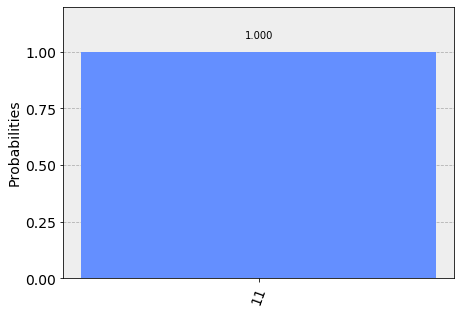

In [7]:
from qiskit import QuantumRegister
from qiskit import ClassicalRegister
from qiskit import QuantumCircuit
from qiskit import Aer
from qiskit import execute

qreg = QuantumRegister(3)
creg = ClassicalRegister(2)
qc = QuantumCircuit(qreg, creg)

qc.h(qreg[0:2])
qc.x(qreg[2])
qc.h(qreg[2])
qc.barrier()

#oracle
qc.ccx(qreg[0], qreg[1], qreg[2])
qc.barrier()

#diffusion
qc.h(qreg[0:2])
qc.x(qreg[0:2])

qc.h(qreg[1])
qc.cx(qreg[0], qreg[1])
qc.h(qreg[1])

qc.x(qreg[0:2])
qc.h(qreg[0:2])
qc.barrier()

qc.measure(qreg[0:2], creg)

#qc.draw(output='mpl')

simulator = Aer.get_backend('qasm_simulator')
results = execute(qc, simulator).result()
from qiskit.tools.visualization import plot_histogram


plot_histogram(results.get_counts())

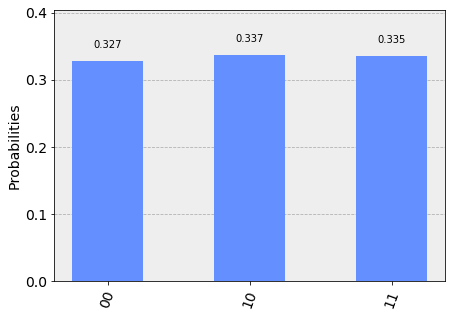

In [6]:
from qiskit import QuantumRegister
from qiskit import ClassicalRegister
from qiskit import QuantumCircuit
from qiskit import Aer
from qiskit import execute
from numpy import pi

qreg = QuantumRegister(2)
creg = ClassicalRegister(2)
qc = QuantumCircuit(qreg, creg)

qc.ry(1.910634, qreg[1])
qc.ch(qreg[1], qreg[0])

qc.barrier()

qc.measure(qreg[0], creg[1])
qc.measure(qreg[1], creg[0])


qc.measure(qreg[0:2], creg)

#qc.draw(output='mpl')

simulator = Aer.get_backend('qasm_simulator')
results = execute(qc, simulator, shots=10000).result()
from qiskit.tools.visualization import plot_histogram


plot_histogram(results.get_counts())

In [1]:
# get results from a job in IBM Q account

from qiskit import IBMQ

# get the latest job on your account
#provider = IBMQ.get_provider(hub='ibm-q')
#backend = provider.get_backend('ibmq_qasm_simulator')
#job = backend.jobs()[0]

provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_qasm_simulator')
#job = backend.retrieve_job('5d9f9a509fa627001873bb66')
#job = backend.retrieve_job('5da08f2c9e95940019e2c1ed')
#job = backend.retrieve_job('5da0d3f16295710019479803')
#job = backend.retrieve_job('5da18666194ed40018473b4d')
#job = backend.retrieve_job('5da1c72e743a6b001814b967')
#job = backend.retrieve_job('5da21b7fecbd6d0018d9a370')
job = backend.retrieve_job('5da2a0930dfc860018b4a6dc')
job_result = job.result()

#counts = job.result().get_counts()
#counts_sorted = sorted(counts.items(), key=lambda x:x[1], reverse=True)
#counts_sorted[0:9]

In [4]:
counts = job.result().get_counts()
counts_sorted = sorted(counts.items(), key=lambda x:x[1], reverse=True)
counts_sorted

[('00010110111101', 30),
 ('00010110110001', 25),
 ('00010111100001', 25),
 ('10001101110010', 24),
 ('01001110110001', 22),
 ('01000010111101', 22),
 ('10000001111110', 19),
 ('00011110110001', 17),
 ('00101101110010', 17),
 ('00111110010111', 15),
 ('00101011010110', 14),
 ('01001011100001', 13),
 ('10000011010110', 13),
 ('00100111010010', 12),
 ('01000011101001', 12),
 ('11000110010011', 12),
 ('00111101101011', 11),
 ('10000111010010', 11),
 ('00101001111110', 10),
 ('00101001110010', 10),
 ('00111110010011', 9),
 ('11000001101011', 9),
 ('00011011100001', 9),
 ('11001001100011', 9),
 ('00111001100011', 9),
 ('00111101100011', 8),
 ('11000010010111', 8),
 ('00110110010011', 8),
 ('00010111101001', 8),
 ('00101011010010', 7),
 ('01000111001001', 5),
 ('00000111101010', 5),
 ('10000100000011', 5),
 ('10010111000100', 5),
 ('00011100111100', 4),
 ('01000101000110', 4),
 ('00001110110101', 4),
 ('11110011011110', 4),
 ('01011000100010', 4),
 ('10001101100010', 4),
 ('00000011000110', 